1.复习课上内容。

2.理论题：

2.1 简述倒排索引怎样能快速检索相应文档 ？

通过属性值来确定该属性所在记录位置的索引方法, 包括词项词典和倒排记录表两个部分。倒排索引是信息检索系统中最常用的数据结构, 倒排索引表是由一组包含属性值和属性所在地址的记录所形成的二维表, 其存储结构对检索的效率和效果起着至关重要的作用。

倒排索引主要由两个部分组成：“单词词典”和“倒排文件”。
1.单词词典包含了所有粒度的拆分词；
2.倒排文件则保存了该词对应的所有相关信息。

借助单词——文档矩阵模型，通过这个模型可以很方便知道某篇文档包含哪些关键词，某个关键词被哪些文档所包含。单词-文档矩阵的具体数据结构可以是倒排索引、签名文件、后缀树等


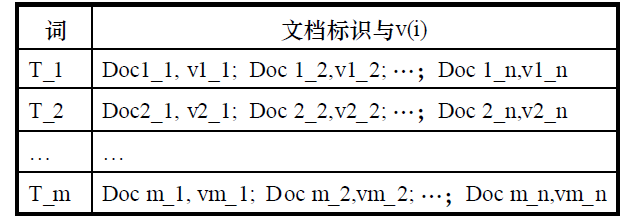

根据inverted index的模型完成了布尔的查询的要求，复杂的布尔查询也可以在基本的and、or、not逻辑基础实现上嵌套实现，最后通过用查询的单词在该文档中出现的个数/总数作为简单的排序检索。

2.2 简述检索式对话系统优缺点 ？

优点：1.生成语法正确的句子；2.相对简单，模型搭建容易，不需要训练调参。

缺点：1.不够灵活，句式单一死板，如果当前对话不在语料库中会导致当前对话不好；2.存储需求高，需要把所有语料库存储起来；3速度不快，需要把当前的context与语料库所有语料进行对比才能得出与哪些相关。

2.3 简述生成式对话系统优缺点？

优点：1.灵活，可以生成不在语料库的句子；2.不必保留所有数据。

缺点：1.不太稳定，可能出现上下文不一致；2.容易生成安全性回答，比如I don`t know，因为训练集中多次出现，模型会给一个高概率，导致实践应用中会说这句话; 3.语义语法，语义上也会有错误，比如“喝西瓜”，语法上不一定生成语法正确的句子。

2.4 什么是意图识别(intention detection)和槽填充(slot filling) ?

在一个任务型对话系统中会含有多种意图和槽值，对于意图识别来说本质上就是一个文本分类的任务。根据领域分类的结果进一步确定用户的具体意图，不同的用户意图对应不同的具体任务。例如，餐厅领域中场景的用户意图包括餐厅推荐、餐厅预定和餐厅比较等。

对于槽值填充来说本质上是一个序列标注的任务（采用BIO的形式来标注），每个任务对应的槽位信息由一系列键-值对构成。每个键对应一个具体的槽位，例如餐厅预定任务中的就餐时间、就餐地点、餐厅名称和就餐人数等；每个值对应当前槽位对应的具体赋值。


2.5 简述阿里小蜜框架 ？

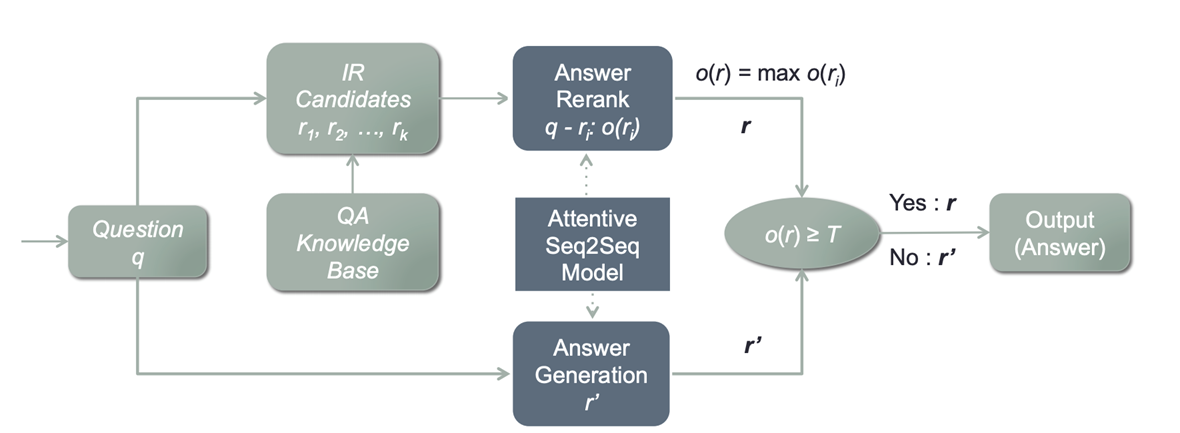

生成式和抽取式的混合模型。
PlanA检索式：IR：倒排索引→QA:里面存储的是对话的数据→Answer Rerank: 进行重排序→O(r): 如果相关度大于某个阈值，就可以把选取式的结果输出。
如果小于阈值，就采用PlanB生成式：Attentive Seq2Seq Model → Answer Generation→输出结果。

简言之，如果谈论的话题在数据集中出现，可以通过检索式PlanA; 如果谈论的话题没有出现在数据集中或者相关度低，就采取PlanB生成式。

参考：https://arxiv.org/abs/1801.05032

2.6 简述生成式对话系统如果处理对话历史 ？

Seq2Seq模型源于机器翻译，Seq2Seq模型与对话序列相同。用Q和R对进行训练,新来的序列，用encoder和Decoder方式产生句子。缺点在于一轮训练，没考虑多轮。常规情况下，对话系统里，会对对话历史做这存储，然后对其进行编码，利用对话管理(Dialog Management)和对话策略(Dialog Policy)决定下一步。现在通常的做法是基本模型利用两个循环神经网络：一个循环神经网络作为编码器，将输入序列转换成定长的向量，将向量视为输入序列的语义表示；另一个循环神经网络作为解码器，根据输入序列的语义表示生成输出序列。

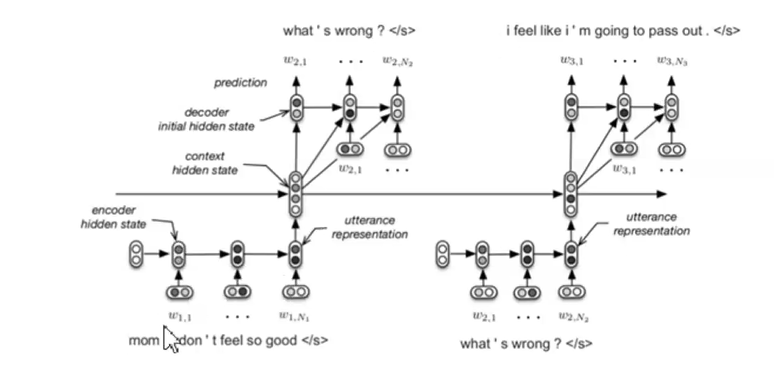

两个RNN共同执行，一个RNN表示第一轮对话，经过RNN后会得到一个序列，代表的是这一轮对话的所有信息。第二轮对话也会用一个RNN，然后得到另外一个序列，这个序列就是历史信息embedding history，节点考虑了历史对话信息。相当于用了历史对话信息，这一轮考虑到前面信息，所有对话历史的embedding，产生该论对话的时候就用另外一个RNN，这个RNN就是产生当前回复。也就是说，用层级RNN，用两个RNN共同执行。还包含了另外一个RNN，对历史信息的一个embedding，对所有历史信息做一个提取，得到向量，这个向量是RNN最后时间节点的hidden state。这就可以当做整句话的embedding,相当于RNN对每一轮的history对话变成一个embedding，代表对话中整个句子的信息，当拥有这些信息之后，基于信息产生当前的对话的回复。


随着Tranfomer的发展，google新的做法会用Transformer。GPT符合对话信息。

在对话中的回复 S<sub>t</sub> 是基于对话历史 S<sub>1</sub> ~  S<sub>t-2</sub> 及当前消息 S<sub>t-1</sub>来生成的。在现有的多轮对话系统中，多数方法都是将对话历史与当前消息（query）一起进行编码来实现对话内容的建模，然后再基于这个编码结果进行 回复生成工作。

王纯宇（2019）以多轮对话中的主题变化为切入点，通过对话历史预测回复的主题信息，然后将其加入到回复的生成过程，从而利用主题信息使生成回复信息更加丰富。

对话历史建模方法：词嵌入方法、基于层次模型方法、融合注意力机制方法、融合主题预测方法


参考：1.陈晨、严睿等（2019）基于深度学习的开放领域对话系统研究综述
2.王纯宇(2019)融合主题预测的多轮对话回复生成

2.7 简述生成对话系统解码器解码方法 ？

静态解码过程在解码前固定每一句话的权重，静态注意力解码过程计算每一句上下文的重要程度。
动态注意力解码过程是维护一个权重矩阵，在解码过程中动态的更新每一句话的权重。


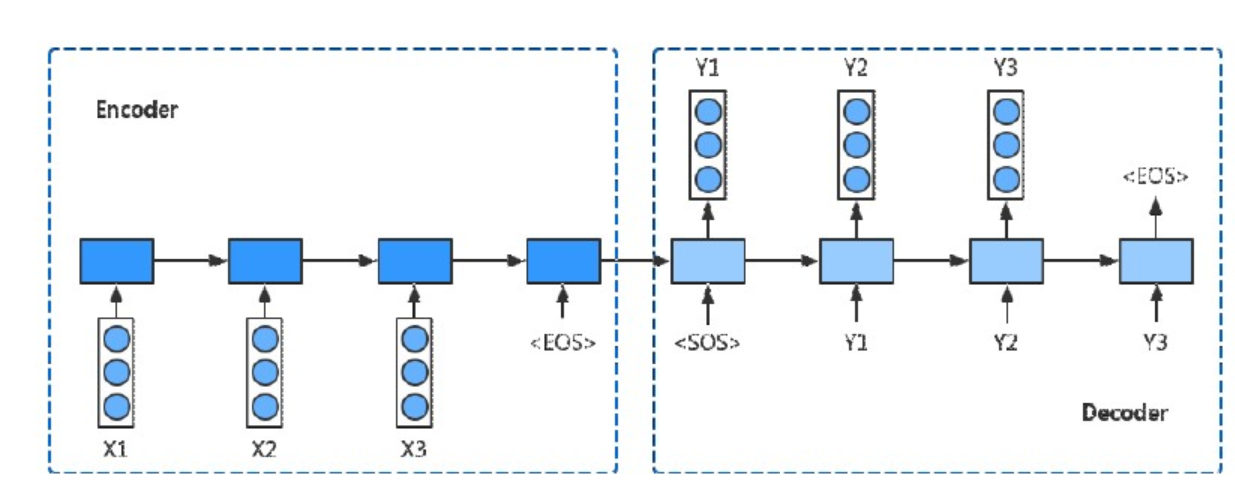

Seq2Seq模型中的解码器负责对输入序列经编码器计算得出的语义表示C进行解码，将其转换为目标序列。解码过程通常使用另一个循环神经网络作为解码器来实现，解码器将编码器最后一个时间节点的隐层状态作为初始隐层状态，并以一个$“<SOS>”$标志作为输入，表示解码过程的开始。解码过程的t时刻接受上一时刻解码词语的embedding以及上一时刻的隐层状态$S_t-1$作为输入，经过计算将当前事件点的隐层状态$S_t$和预测词语$y_t$进行输出。计算公式

 S<sub>t</sub> = RNN<sub>dec</sub>( $\hat{x}$ <sub>t-1</sub>),S<sub>t-1</sub>) 
 
 y<sub>t</sub> = argmax(softmax(W<sub>s</sub>$\hat{S}$ <sub>t</sub>))

许博（2019）在解码的词表中加入了 $<EOS>$ 和$<EOF>$两个标注，并为这两个标志随机生成他们的初始向量，并且在序列到序列模型进行解码的时候，语句均已$<EOS>$作为第一个解码的单词，当解码到$<EOF>$时停止解码，其余对话的cut等设置跟检索模型一致。

参考：许博（2019） 检索和生成结合的对话模型


2.8 简述检索式对话系统中用于排序的方法指标？

Ranking1: TF-IDF,指标为COSIN，越小越相似

Ranking2: BM25

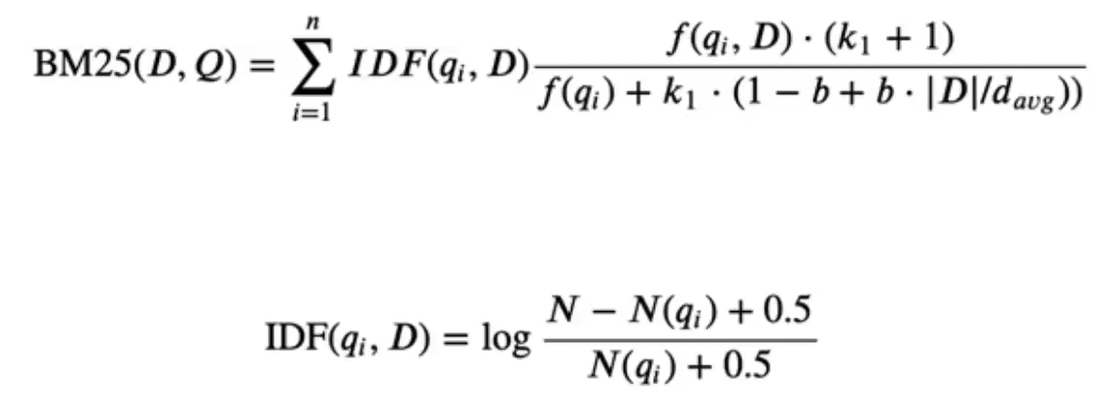

2.9 简述检索式对话中如何使用对话历史 ？

对句子改写，先经过分词后，然后对所有可能的插入、取代操作，会得到一系列的句子。通过语料计算句子出现的概率，把最大的概率挑出来，比如在办卡场景：“那黑金卡呢”→“那请问办理黑金卡需要多久呢”，选取对这句话进行替换，然后进行抽取式提取，排序，回复。

基于深度学习的对话模型使用考虑语义的深度文本匹配模型将历史对话与候选回复进行匹配，从而挑选出分数最高的回复，总结起来大体就是通过一定算法将文本进行向量化表示，然后利用一些算法对于输入的文本表示与已存储的文本表示进行相似度计算，匹配出最优的结果进行回复。

2015年，Ryan Lowe等人公布了一个有关Ubuntu技术支持咨询的对话数据，100万个多轮对话，超过700万的对话语句和一亿个词。真的其提出的数据集，论文中通过运用TF-IDF、卷积神经网络和循环神经网络三种方法分别编码了整个上下文（把所有对话历史拼接起来）和候选回复，然后基于编码后的上下文向量和回复向量计算点积作为匹配分数，选取分数最高的进行回复。

2.10 简述基于规则的对话系统优缺点 ？

Advantages: 1. simple model; 2.grammatically correct

Disadvantages: 2. hard to maintain; 2.human engineering; 3.lack semantic understanding

优点：1.模型简单，可以快速上线,适合处理小数据集；2.语法正确。

缺点：1.很难维护，设置的规则有限，而人的对话具有复杂性；2.需要大量人工；3.缺乏语义上的理解。